In [56]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta
from datetime import datetime

passengers_data = pd.read_csv('passengers_0.csv')
passengers_data['ArrivalTime'] = pd.to_datetime(passengers_data['ArrivalTime'], unit='s')

time_interval_minutes = 15

arrival_counts = passengers_data['ArrivalTime'].dt.floor(f'{time_interval_minutes}T').value_counts()
arrival_counts = arrival_counts.sort_index()
arrival_counts

time_range = pd.date_range(start='1970-01-01 00:00:00', end='1970-01-01 12:00:00', freq=f'{time_interval_minutes}T')

arrival_df = pd.DataFrame({'ArrivalCount': [0] * len(time_range)}, index=time_range)
arrival_df['TimePeriod'] = arrival_df.index
arrival_df.loc[arrival_counts.index, 'ArrivalCount'] = arrival_counts.values
arrival_df.reset_index(drop=True, inplace=True)
arrival_df = arrival_df[["TimePeriod", "ArrivalCount"]]

security_data = pd.read_csv('security.csv')
security_data['Time'] = pd.to_datetime(security_data['Time'], unit='s')

# Merge security_data and arrival_df based on the 'Time' column
merged_data = pd.merge(security_data, arrival_df, left_on='Time', right_on='TimePeriod', how='left')
# Drop unnecessary columns, if needed
merged_data.drop(columns=['TimePeriod'], inplace=True)

# Filter data for the desired time range (before 12:00)
filtered_data = merged_data[merged_data['Time'] <= '1970-01-01 12:00:00']
filtered_data["SecurityCapacity"] = filtered_data["Lanes"]*45
filtered_data["ExcessPassengers"] = filtered_data.apply(lambda row: max(row["ArrivalCount"] - row["SecurityCapacity"], 0), axis=1)
filtered_data["IdleCapacity"] = filtered_data.apply(lambda row: max(row["SecurityCapacity"] - row["ArrivalCount"], 0), axis=1)
filtered_data = filtered_data[["Time","ArrivalCount","Lanes","SecurityCapacity","ExcessPassengers","IdleCapacity"]] 

filtered_data

C:\Users\14399\AppData\Local\Temp/ipykernel_14820/1666864556.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["SecurityCapacity"] = filtered_data["Lanes"]*45
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1846: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])  # type: ignore[arg-type]
C:\Users\14399\AppData\Local\Temp/ipykernel_14820/1666864556.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Time,ArrivalCount,Lanes,SecurityCapacity,ExcessPassengers,IdleCapacity
0,1970-01-01 00:00:00,0.0,1,45,0.0,45.0
1,1970-01-01 00:15:00,0.0,1,45,0.0,45.0
2,1970-01-01 00:30:00,0.0,1,45,0.0,45.0
3,1970-01-01 00:45:00,0.0,1,45,0.0,45.0
4,1970-01-01 01:00:00,0.0,1,45,0.0,45.0
5,1970-01-01 01:15:00,0.0,1,45,0.0,45.0
6,1970-01-01 01:30:00,0.0,1,45,0.0,45.0
7,1970-01-01 01:45:00,0.0,1,45,0.0,45.0
8,1970-01-01 02:00:00,0.0,1,45,0.0,45.0
9,1970-01-01 02:15:00,4.0,1,45,0.0,41.0


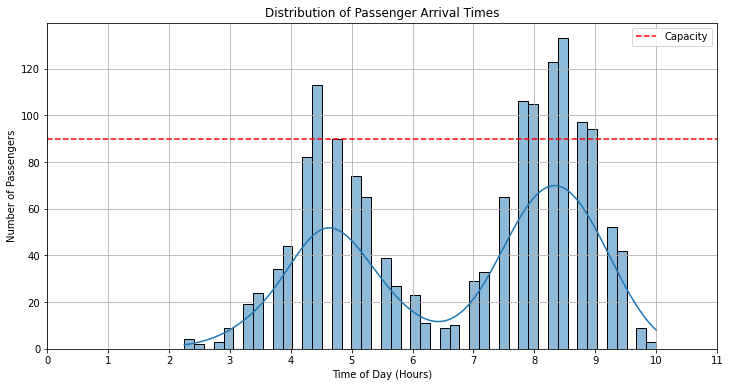

In [2]:
passengers_data = pd.read_csv('passengers_0.csv')

# 将ArrivalTime对齐到最近的15分钟区间
passengers_data['AlignedArrivalTime'] = passengers_data['ArrivalTime'] - (passengers_data['ArrivalTime'] % (15 * 60))

# 绘制直方图
plt.figure(figsize=(12, 6))
sns.histplot(passengers_data['AlignedArrivalTime']/3600, bins=12*4, kde=True)
plt.title('Distribution of Passenger Arrival Times')
plt.xlabel('Time of Day (Hours)')
plt.ylabel('Number of Passengers')
plt.xticks(range(0, 12))
plt.grid(True)
plt.axhline(y=90, color='red', linestyle='--', label='Capacity')
plt.legend()
plt.show()


# passengers_data["ArrivalTime_hour"] = passengers_data["ArrivalTime"]/3600
# # Plotting the distribution of arrival times
# plt.figure(figsize=(12, 6))
# sns.histplot(passengers_data['ArrivalTime_hour'], bins=24, kde=True)
# plt.title('Distribution of Passenger Arrival Times')
# plt.xlabel('Time of Day (Hours)')
# plt.ylabel('Number of Passengers')
# plt.xticks(range(0, 12))
# plt.grid(True)
# plt.axhline(y=90, color='red', linestyle='--', label='Capacity')

# Vitual Queue

In [3]:
# {"flight": ["starting times"], ...}, {'flight', ["capacity"]}, zip(), duration = 15
virtual_queue = [
    {"flights": "BM2616", "time_slots": [4*3600], "capacity":[30]}, #Depature 05:45
    {"flights": "XC6333", "time_slots": [5.25*3600, 5.5*3600, 5.75*3600],"capacity":[20,20,5]}, #Depature 06:00
    {"flights": "OO2037", "time_slots": [5.5*3600, 5.75*3600, 6*3600], "capacity":[20,20,5]}, #Depature 06:15
    {"flights": "HP4524", "time_slots": [5.5*3600, 5.75*3600, 6*3600, 6.25*3600],"capacity":[10,20,5,10]}, #Depature 06:30
    {"flights": "DN7022", "time_slots": [6.5*3600, 6.25*3600, 6*3600],"capacity":[30,20,10]}, #Depature 06:45

    {"flights": "QX7315", "time_slots": [7*3600], "capacity":[20]}, #Depature 09:30
    {"flights": "SS2446", "time_slots": [9.25*3600, 9.5*3600], "capacity":[20, 20]}, #Depature 09:45
    {"flights": "ZI1701", "time_slots": [9.75*3600, 9.5*3600], "capacity":[20, 20]}, #Depature 10:00
    {"flights": "HC1255", "time_slots": [10*3600, 9.75*3600, 9.5*3600], "capacity":[20,20, 20]}, #Depature 10:15
    {"flights": "HF1818", "time_slots": [10.25*3600, 10*3600, ], "capacity":[20, 20]}, #Depature 10:30
    {"flights": "IG2596", "time_slots": [10.5*3600], "capacity":[40]} #Depature 10:45
]

total_capacity = 0
for flight_info in virtual_queue:
    total_capacity += sum(flight_info["capacity"])

print("总容量为:", total_capacity)

type(virtual_queue)

总容量为: 465


list

In [34]:
import numpy as np
import random
from datetime import datetime, timedelta

def process_virtual_queue(passengers_data, virtual_queue):
    #Peak period 1: 04:15 - 05:15
    peak_periods1_start = 4.25*60*60
    peak_periods1_end = 5.25*60*60

    #Peak period 2: 07:30 - 09:00
    peak_periods2_start = 7.5*60*60
    peak_periods2_end = 9*60*60

    passengers_data["new_ArrivalTime"] = passengers_data["ArrivalTime"]
    passengers_data['Priority'] = 0
    
    # 遍历虚拟队列列表
    for flight_info in virtual_queue:
        flight_code = flight_info["flights"]
        time_slots = flight_info["time_slots"]
        capacities = flight_info["capacity"]

        # 获取符合条件的乘客
        eligible_passengers = passengers_data[((passengers_data['ArrivalTime'].between(peak_periods1_start, peak_periods1_end)) | 
                                           (passengers_data['ArrivalTime'].between(peak_periods2_start, peak_periods2_end))) & 
                                           (passengers_data['FlightNumber'] == flight_code)]

        # 随机选择乘客并分配到时间槽
        for i, passenger in eligible_passengers.iterrows():
            #如果所有时间槽都用完，可以在这里跳出循环
            if not time_slots:
                break

            time_slot = random.choice(time_slots)
            capacity = capacities[time_slots.index(time_slot)]

            # 检查时间槽容量是否用完
            if capacity == 0:
                continue

            # 生成随机到达时间，介于time_slot和time_slot + 15分钟之间
            random_arrival_time = random.uniform(time_slot, time_slot + 0.25 * 3600)

            # 进行相应的处理，例如更新到达时间、设置优先级等
            passengers_data.loc[i, 'new_ArrivalTime'] = random_arrival_time
            passengers_data.loc[i, 'Priority'] = 1  # 设置优先级

            # 减少相应时间槽的容量
            capacities[time_slots.index(time_slot)] -= 1

            # 如果时间槽容量用完，可以在这里移除该时间槽
            if capacities[time_slots.index(time_slot)] == 0:
                time_slots.remove(time_slot)
                
    passengers_data["new_ArrivalTime_formatted"] = passengers_data["new_ArrivalTime"].apply(lambda x: (datetime(1970, 1, 1) + timedelta(seconds=x)).strftime('%H:%M'))
    passengers_data["DepartureTime_formatted"] = passengers_data["DepartureTime"].apply(lambda x: (datetime(1970, 1, 1) + timedelta(seconds=x)).strftime('%H:%M'))

    return passengers_data

virtual_queue = [
    {"flights": "BM2616", "time_slots": [4*3600], "capacity":[30]}, #Depature 05:45
    {"flights": "XC6333", "time_slots": [5.25*3600, 5.5*3600, 5.75*3600],"capacity":[20,20,5]}, #Depature 06:00
    {"flights": "OO2037", "time_slots": [5.5*3600, 5.75*3600, 6*3600], "capacity":[20,20,5]}, #Depature 06:15
    {"flights": "HP4524", "time_slots": [5.5*3600, 5.75*3600, 6*3600, 6.25*3600],"capacity":[10,20,5,10]}, #Depature 06:30
    {"flights": "DN7022", "time_slots": [6.5*3600, 6.25*3600, 6*3600],"capacity":[30,20,10]}, #Depature 06:45

    {"flights": "QX7315", "time_slots": [7*3600], "capacity":[20]}, #Depature 09:30
    {"flights": "SS2446", "time_slots": [9.25*3600, 9.5*3600], "capacity":[20, 20]}, #Depature 09:45
    {"flights": "ZI1701", "time_slots": [9.75*3600, 9.5*3600], "capacity":[20, 20]}, #Depature 10:00
    {"flights": "HC1255", "time_slots": [10*3600, 9.75*3600, 9.5*3600], "capacity":[20,20, 20]}, #Depature 10:15
    {"flights": "HF1818", "time_slots": [10.25*3600, 10*3600, ], "capacity":[20, 20]}, #Depature 10:30
    {"flights": "IG2596", "time_slots": [10.5*3600], "capacity":[40]} #Depature 10:45
]

passengers_data = pd.read_csv('passengers_0.csv').sort_values(by='ArrivalTime')
security_data = pd.read_csv('security.csv')
flights_data = pd.read_csv('flights.csv')
passengers_data = pd.merge(passengers_data, flights_data, left_on='FlightNumber', right_on='FlightNumber', how='left')

passengers_data = process_virtual_queue(passengers_data, virtual_queue)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1846: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])  # type: ignore[arg-type]


In [35]:
passengers_data[passengers_data["Priority"]==1]

,Id,ArrivalTime,FlightNumber,DepartureTime,Passengers,new_ArrivalTime,Priority,new_ArrivalTime_formatted,DepartureTime_formatted
139,FUDVUWVTT0CV1I7DIVTH,15304.524860,OO2037,22500,180,20804.610939,1,05:46,06:15
140,BRHZMXK73XTF4A6KKD7T,15308.084282,XC6333,21600,130,21032.234359,1,05:50,06:00
141,MP6NF9BFZIBJ7KC94IQQ,15315.905182,BM2616,20700,80,15016.663195,1,04:10,05:45
142,DRV9I4D1ATNTUFBJWCN1,15318.430889,BM2616,20700,80,14511.441284,1,04:01,05:45
143,BKNUYD2FK4QOPBSPKO07,15335.937263,BM2616,20700,80,14609.396184,1,04:03,05:45
...,...,...,...,...,...,...,...,...,...
1332,FUJC0TVTAONKR5FU6XMA,32060.656516,HF1818,37800,87,36281.979431,1,10:04,10:30
1349,F4IDGDHK7I4BTG3OQ4VH,32236.747919,HF1818,37800,87,36210.405632,1,10:03,10:30
1351,9A1BUOPREWFS3O6BUK32,32249.326999,HF1818,37800,87,37500.122245,1,10:25,10:30
1364,PONTAR94WFO7Z0CORAIJ,32334.150214,HF1818,37800,87,36459.726875,1,10:07,10:30


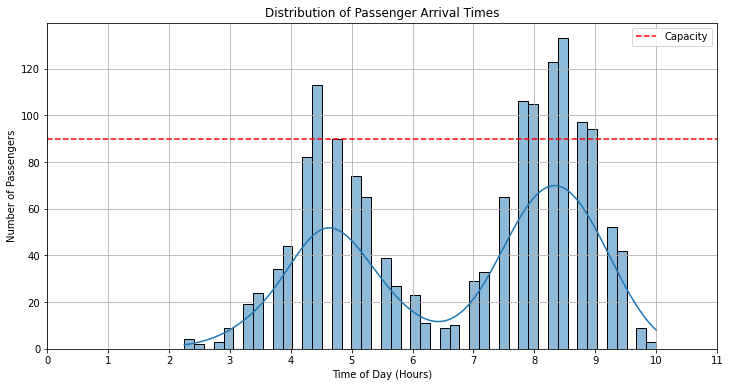

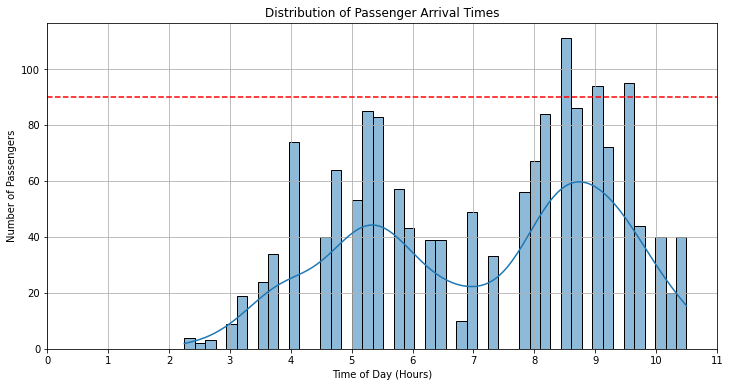

In [6]:
# 将ArrivalTime对齐到最近的15分钟区间
passengers_data['AlignedArrivalTime'] = passengers_data['ArrivalTime'] - (passengers_data['ArrivalTime'] % (15 * 60))

# 绘制直方图
plt.figure(figsize=(12, 6))
sns.histplot(passengers_data['AlignedArrivalTime']/3600, bins=12*4, kde=True)
plt.title('Distribution of Passenger Arrival Times')
plt.xlabel('Time of Day (Hours)')
plt.ylabel('Number of Passengers')
plt.xticks(range(0, 12))
plt.grid(True)
plt.axhline(y=90, color='red', linestyle='--', label='Capacity')
plt.legend()
plt.show()


passengers_data['new_AlignedArrivalTime'] = passengers_data['new_ArrivalTime'] - (passengers_data['new_ArrivalTime'] % (15 * 60))
# Plotting the distribution of new arrival times
plt.figure(figsize=(12, 6))
sns.histplot(passengers_data['new_AlignedArrivalTime']/3600, bins=12*4, kde=True)
plt.title('Distribution of Passenger Arrival Times')
plt.xlabel('Time of Day (Hours)')
plt.ylabel('Number of Passengers')
plt.xticks(range(0, 12))
plt.grid(True)
plt.axhline(y=90, color='red', linestyle='--', label='Capacity')

In [8]:
#Peak period 1: 04:15 - 05:15
peak_periods1_start = 4.25*60*60
peak_periods1_end = 5.25*60*60

#Peak period 2: 07:30 - 09:00
peak_periods2_start = 7.5*60*60
peak_periods2_end = 9*60*60

passengers_data[((passengers_data['new_ArrivalTime'].between(peak_periods1_start, peak_periods1_end)) | 
                                       (passengers_data['new_ArrivalTime'].between(peak_periods2_start, peak_periods2_end)))]

,Id,ArrivalTime,FlightNumber,DepartureTime,Passengers,new_ArrivalTime,Priority,new_ArrivalTime_formatted,DepartureTime_formatted,AlignedArrivalTime,new_AlignedArrivalTime
254,73YRX6QDNH0VWME9D3RL,16466.789319,HP4524,23400,70,16466.789319,0,04:34,06:30,16200.0,16200.0
257,RWL62IYVHD9KD90UQ0FH,16482.385283,HP4524,23400,70,16482.385283,0,04:34,06:30,16200.0,16200.0
269,HO56GL17EV4J45AVX7KP,16646.770900,OO2037,22500,180,16646.770900,0,04:37,06:15,16200.0,16200.0
270,0U3XY0W9P4PVDHL97LTJ,16653.244882,HP4524,23400,70,16653.244882,0,04:37,06:30,16200.0,16200.0
274,CQG69MD9CQ2A2C7VKQDY,16693.803848,OO2037,22500,180,16693.803848,0,04:38,06:15,16200.0,16200.0
...,...,...,...,...,...,...,...,...,...,...,...
1367,P4EM01VVCI673BOQ46ML,32355.842397,IG2596,38700,153,32355.842397,0,08:59,10:45,31500.0,31500.0
1369,BXVYM7YTB1ZUDE2VDKPQ,32360.131665,HC1255,36900,154,32360.131665,0,08:59,10:15,31500.0,31500.0
1370,ZXH7RM6KTFZNX8VRAVAE,32372.410859,ZI1701,36000,163,32372.410859,0,08:59,10:00,31500.0,31500.0
1371,GR781R9OA1C7NTENNL2Z,32381.798529,HC1255,36900,154,32381.798529,0,08:59,10:15,31500.0,31500.0


# Suggestion system

In [9]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta
from datetime import datetime
import warnings

# 忽略所有警告
warnings.filterwarnings("ignore")


passengers_data = pd.read_csv('passengers_0.csv')
passengers_data['ArrivalTime'] = pd.to_datetime(passengers_data['ArrivalTime'], unit='s')
security_data = pd.read_csv('security.csv')
security_data['Time'] = pd.to_datetime(security_data['Time'], unit='s')

time_interval_minutes = 15

arrival_counts = passengers_data['ArrivalTime'].dt.floor(f'{time_interval_minutes}T').value_counts()
arrival_counts = arrival_counts.sort_index()

time_range = pd.date_range(start='1970-01-01 00:00:00', end='1970-01-01 12:00:00', freq=f'{time_interval_minutes}T')
arrival_df = pd.DataFrame({'ArrivalCount': [0] * len(time_range)}, index=time_range)
arrival_df['TimePeriod'] = arrival_df.index
arrival_df.loc[arrival_counts.index, 'ArrivalCount'] = arrival_counts.values
arrival_df.reset_index(drop=True, inplace=True)
arrival_df = arrival_df[["TimePeriod", "ArrivalCount"]]

# Merge security_data and arrival_df based on the 'Time' column
merged_data = pd.merge(security_data, arrival_df, left_on='Time', right_on='TimePeriod', how='left')
# Drop unnecessary columns, if needed
merged_data.drop(columns=['TimePeriod'], inplace=True)

# Filter data for the desired time range (before 12:00)
filtered_data = merged_data[merged_data['Time'] <= '1970-01-01 12:00:00']
filtered_data["SecurityCapacity"] = filtered_data["Lanes"]*45
filtered_data["ExcessPassengers"] = filtered_data.apply(lambda row: max(row["ArrivalCount"] - row["SecurityCapacity"], 0), axis=1)
filtered_data["IdleCapacity"] = filtered_data.apply(lambda row: max(row["SecurityCapacity"] - row["ArrivalCount"], 0), axis=1)
filtered_data = filtered_data[["Time","ArrivalCount","Lanes","SecurityCapacity","ExcessPassengers","IdleCapacity"]] 

filtered_data = filtered_data[filtered_data['Time'] <= '1970-01-01 10:30:00']
filtered_data = filtered_data[filtered_data['Time'] >= '1970-01-01 04:00:00']
peak_data = filtered_data


# 恢复警告的默认处理方式（可选）
warnings.filterwarnings("default")
peak_data

,Time,ArrivalCount,Lanes,SecurityCapacity,ExcessPassengers,IdleCapacity
16,1970-01-01 04:00:00,44.0,2,90,0.0,46.0
17,1970-01-01 04:15:00,82.0,2,90,0.0,8.0
18,1970-01-01 04:30:00,113.0,2,90,23.0,0.0
19,1970-01-01 04:45:00,90.0,2,90,0.0,0.0
20,1970-01-01 05:00:00,74.0,2,90,0.0,16.0
21,1970-01-01 05:15:00,65.0,2,90,0.0,25.0
22,1970-01-01 05:30:00,39.0,2,90,0.0,51.0
23,1970-01-01 05:45:00,27.0,2,90,0.0,63.0
24,1970-01-01 06:00:00,23.0,1,45,0.0,22.0
25,1970-01-01 06:15:00,11.0,1,45,0.0,34.0


In [10]:
# 忽略所有警告
warnings.filterwarnings("ignore")

passengers_data = pd.read_csv('passengers_0.csv')
passengers_data['ArrivalTime'] = pd.to_datetime(passengers_data['ArrivalTime'], unit='s')
security_data = pd.read_csv('security.csv')
security_data['Time'] = pd.to_datetime(security_data['Time'], unit='s')

time_interval_minutes = 15
time_range = pd.date_range(start='1970-01-01 00:00:00', end='1970-01-01 12:00:00', freq=f'{time_interval_minutes}T')

# 创建一个字典用于存储航班号对应的DataFrame
flight_dfs = {}

# 将新增列的FlightNumber_ArrivalCount重命名为对应的航班列
for flight_column in passengers_data["FlightNumber"].unique():
    flight_dfs[flight_column] = passengers_data[passengers_data["FlightNumber"] == flight_column].copy()

flight_dfs_list = list(flight_dfs.values())

for df in flight_dfs_list:
    flight_code = df["FlightNumber"].iloc[0]
    arrival_counts = df['ArrivalTime'].dt.floor(f'{time_interval_minutes}T').value_counts()
    arrival_counts = arrival_counts.sort_index()
    
    arrival_df = pd.DataFrame({'ArrivalCount': [0] * len(time_range)}, index=time_range)
    arrival_df['TimePeriod'] = arrival_df.index
    arrival_df.loc[arrival_counts.index, 'ArrivalCount'] = arrival_counts.values
    arrival_df.reset_index(drop=True, inplace=True)
    arrival_df = arrival_df[["TimePeriod", 'ArrivalCount']]

    # Merge security_data and arrival_df based on the 'Time' column
    merged_data = pd.merge(security_data, arrival_df, left_on='Time', right_on='TimePeriod', how='left')
    # Drop unnecessary columns, if needed
    merged_data.drop(columns=['TimePeriod'], inplace=True)

    # Filter data for the desired time range (before 12:00)
    filtered_data = merged_data[merged_data['Time'] <= '1970-01-01 12:00:00']
    filtered_data["SecurityCapacity"] = filtered_data["Lanes"]*45
    filtered_data["ExcessPassengers"] = filtered_data.apply(lambda row: max(row['ArrivalCount'] - row["SecurityCapacity"], 0), axis=1)
    filtered_data["IdleCapacity"] = filtered_data.apply(lambda row: max(row["SecurityCapacity"] - row['ArrivalCount'], 0), axis=1)
    filtered_data = filtered_data[["Time",'ArrivalCount',"Lanes","SecurityCapacity","ExcessPassengers","IdleCapacity"]] 

    filtered_data = filtered_data[filtered_data['Time'] <= '1970-01-01 10:30:00']
    filtered_data = filtered_data[filtered_data['Time'] >= '1970-01-01 04:00:00']
    
    peak_data[f'{flight_code}'] = filtered_data['ArrivalCount']

# 恢复警告的默认处理方式（可选）
warnings.filterwarnings("default")
peak_data['TimeSeconds'] = peak_data['Time'].apply(lambda x: (x - datetime(1970, 1, 1)).total_seconds())
# 重新排列列，将'TimeSeconds'移动到第二列
columns = peak_data.columns.tolist()
columns.remove('TimeSeconds')
columns.insert(1, 'TimeSeconds')
peak_data = peak_data[columns]
peak_data

,Time,TimeSeconds,ArrivalCount,Lanes,SecurityCapacity,ExcessPassengers,IdleCapacity,BM2616,XC6333,OO2037,HP4524,DN7022,QX7315,SS2446,ZI1701,HC1255,HF1818,IG2596
16,1970-01-01 04:00:00,14400.0,44.0,2,90,0.0,46.0,6.0,11.0,21.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
17,1970-01-01 04:15:00,15300.0,82.0,2,90,0.0,8.0,19.0,19.0,25.0,7.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
18,1970-01-01 04:30:00,16200.0,113.0,2,90,23.0,0.0,11.0,24.0,49.0,16.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0
19,1970-01-01 04:45:00,17100.0,90.0,2,90,0.0,0.0,6.0,20.0,36.0,8.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0
20,1970-01-01 05:00:00,18000.0,74.0,2,90,0.0,16.0,3.0,16.0,19.0,11.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0
21,1970-01-01 05:15:00,18900.0,65.0,2,90,0.0,25.0,0.0,7.0,9.0,16.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0
22,1970-01-01 05:30:00,19800.0,39.0,2,90,0.0,51.0,0.0,1.0,1.0,7.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0
23,1970-01-01 05:45:00,20700.0,27.0,2,90,0.0,63.0,0.0,0.0,0.0,1.0,24.0,0.0,2.0,0.0,0.0,0.0,0.0
24,1970-01-01 06:00:00,21600.0,23.0,1,45,0.0,22.0,0.0,0.0,0.0,0.0,20.0,0.0,3.0,0.0,0.0,0.0,0.0
25,1970-01-01 06:15:00,22500.0,11.0,1,45,0.0,34.0,0.0,0.0,0.0,0.0,6.0,2.0,2.0,1.0,0.0,0.0,0.0


In [45]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta
from datetime import datetime
import warnings
import copy

def get_peak_data(passengers_data, security_data):
    time_interval_minutes = 15
    time_range = pd.date_range(start='1970-01-01 00:00:00', end='1970-01-01 12:00:00', freq=f'{time_interval_minutes}T')
    
    passengers_data_copy = copy.deepcopy(passengers_data)
    passengers_data_copy['ArrivalTime'] = pd.to_datetime(passengers_data_copy['ArrivalTime'], unit='s')
    
    security_data_copy = copy.deepcopy(security_data)
    security_data_copy['Time'] = pd.to_datetime(security_data_copy['Time'], unit='s')
   
    arrival_counts = passengers_data_copy['ArrivalTime'].dt.floor(f'{time_interval_minutes}T').value_counts()
    arrival_counts = arrival_counts.sort_index()

    arrival_df = pd.DataFrame({'ArrivalCount': [0] * len(time_range)}, index=time_range)
    arrival_df['TimePeriod'] = arrival_df.index
    arrival_df.loc[arrival_counts.index, 'ArrivalCount'] = arrival_counts.values
    arrival_df.reset_index(drop=True, inplace=True)
    arrival_df = arrival_df[["TimePeriod", "ArrivalCount"]]
    
    # Merge security_data and arrival_df based on the 'Time' column
    merged_data = pd.merge(security_data_copy, arrival_df, left_on='Time', right_on='TimePeriod', how='left')
    
    # Drop unnecessary columns, if needed
    merged_data.drop(columns=['TimePeriod'], inplace=True)
    
    # Filter data for the desired time range (before 12:00)
    filtered_data = merged_data[merged_data['Time'] <= '1970-01-01 12:00:00']
    filtered_data["SecurityCapacity"] = filtered_data["Lanes"]*45
    filtered_data["ExcessPassengers"] = filtered_data.apply(lambda row: max(row["ArrivalCount"] - row["SecurityCapacity"], 0), axis=1)
    filtered_data["IdleCapacity"] = filtered_data.apply(lambda row: max(row["SecurityCapacity"] - row["ArrivalCount"], 0), axis=1)
    filtered_data = filtered_data[["Time","ArrivalCount","Lanes","SecurityCapacity","ExcessPassengers","IdleCapacity"]] 

    filtered_data = filtered_data[filtered_data['Time'] <= '1970-01-01 10:30:00']
    filtered_data = filtered_data[filtered_data['Time'] >= '1970-01-01 04:00:00']
    peak_data = filtered_data
    
    # 创建一个字典用于存储航班号对应的DataFrame
    flight_dfs = {}

    # 将新增列的FlightNumber_ArrivalCount重命名为对应的航班列
    for flight_column in passengers_data_copy["FlightNumber"].unique():
        flight_dfs[flight_column] = passengers_data_copy[passengers_data_copy["FlightNumber"] == flight_column].copy()
    
    flight_dfs_list = list(flight_dfs.values())

    for df in flight_dfs_list:
        flight_code = df["FlightNumber"].iloc[0]
        arrival_counts = df['ArrivalTime'].dt.floor(f'{time_interval_minutes}T').value_counts()
        arrival_counts = arrival_counts.sort_index()

        arrival_df = pd.DataFrame({'ArrivalCount': [0] * len(time_range)}, index=time_range)
        arrival_df['TimePeriod'] = arrival_df.index
        arrival_df.loc[arrival_counts.index, 'ArrivalCount'] = arrival_counts.values
        arrival_df.reset_index(drop=True, inplace=True)
        arrival_df = arrival_df[["TimePeriod", 'ArrivalCount']]

        arrival_df = arrival_df[arrival_df['TimePeriod'] <= '1970-01-01 10:30:00']
        arrival_df = arrival_df[arrival_df['TimePeriod'] >= '1970-01-01 04:00:00']

        peak_data[f'{flight_code}'] = arrival_df['ArrivalCount']

    peak_data['TimeSeconds'] = peak_data['Time'].apply(lambda x: (x - datetime(1970, 1, 1)).total_seconds())
    peak_data = peak_data[["Time","TimeSeconds",'ArrivalCount',"Lanes","SecurityCapacity","ExcessPassengers","IdleCapacity","BM2616","XC6333","OO2037","HP4524","DN7022","QX7315","SS2446","ZI1701","HC1255","HF1818","IG2596"]] 

    return peak_data

In [12]:
flight_time_slots = {
    "BM2616": [4*3600, 5.25*3600],#Depature 05:45
    "XC6333": [5.25*3600, 5.5*3600], #Depature 06:00
    "OO2037": [5.25*3600, 5.5*3600, 5.75*3600], #Depature 06:15
    "HP4524": [5.25*3600, 5.5*3600, 5.75*3600, 6*3600], #Depature 06:30
    "DN7022": [5.25*3600, 5.5*3600, 5.75*3600, 6*3600, 6.25*3600], #Depature 06:45
    
    "QX7315": [7*3600], #Depature 09:30
    "SS2446": [9.25*3600], #Depature 09:45
    "ZI1701": [9.25*3600, 9.5*3600], #Depature 10:00
    "HC1255": [9.25*3600, 9.5*3600, 9.75*3600], #Depature 10:15
    "HF1818": [9.25*3600, 9.5*3600, 9.75*3600, 10*3600], #Depature 10:30
    "IG2596": [9.25*3600, 9.5*3600, 9.75*3600, 10*3600, 10.25*3600] #Depature 10:45
}

expected_output = '''virtual_queue = [
    {"flights": "BM2616", "time_slots": [4*3600, 5.25*3600], "capacity":[?,?]}, #Depature 05:45
    {"flights": "XC6333", "time_slots": [5.25*3600, 5.5*3600],"capacity":[?,?]}, #Depature 06:00
    {"flights": "OO2037", "time_slots": [5.25*3600, 5.5*3600, 5.75*3600], "capacity":[?,?,?]}, #Depature 06:15
    {"flights": "HP4524", "time_slots": [5.25*3600, 5.5*3600, 5.75*3600, 6*3600],"capacity":[?,?,?,?]}, #Depature 06:30
    {"flights": "DN7022", "time_slots": [5.25*3600, 5.5*3600, 5.75*3600, 6*3600, 6.25*3600],"capacity":[?,?,?,?,?]}, #Depature 06:45

    {"flights": "QX7315", "time_slots": [7*3600], "capacity":[?]}, #Depature 09:30
    {"flights": "SS2446", "time_slots": [9.25*3600], "capacity":[?]}, #Depature 09:45
    {"flights": "ZI1701", "time_slots": [9.25*3600, 9.5*3600], "capacity":[?,?]}, #Depature 10:00
    {"flights": "HC1255", "time_slots": [9.25*3600, 9.5*3600, 9.75*3600], "capacity":[?,?,?]}, #Depature 10:15
    {"flights": "HF1818", "time_slots": [9.25*3600, 9.5*3600, 9.75*3600, 10*3600], "capacity":[?,?,?,?]}, #Depature 10:30
    {"flights": "IG2596", "time_slots": [9.25*3600, 9.5*3600, 9.75*3600, 10*3600, 10.25*3600], "capacity":[?,?,?,?,?]} #Depature 10:45
]'''

In [28]:
# 忽略所有警告
warnings.filterwarnings("ignore")

passengers_data = pd.read_csv('passengers_0.csv').sort_values(by='ArrivalTime')
security_data = pd.read_csv('security.csv')
flights_data = pd.read_csv('flights.csv')

peak_data = get_peak_data(passengers_data, security_data)
peak_data.loc[peak_data['TimeSeconds'] == 4*3600, 'IdleCapacity'].values[0]
sum(peak_data["IdleCapacity"])

688.0

In [58]:
# Simplified algorithm to allocate passengers to time slots based on 'TimeSeconds'

def allocate_flight_passengers(flight, time_slots, peak_data):
    allocations = {slot: 0 for slot in time_slots}  # Initialize allocations

    for slot in time_slots:
        available_capacity = peak_data.loc[peak_data['TimeSeconds'] == slot, 'IdleCapacity'].values[0]

        for _, row in peak_data.iterrows():
            if row['TimeSeconds'] == slot:
                continue

#             passengers_in_period = row[flight]
#             if passengers_in_period > 0 and available_capacity > 0:
#                 passengers_to_allocate = min(passengers_in_period, available_capacity)
#                 allocations[slot] += passengers_to_allocate
#                 available_capacity -= passengers_to_allocate
            
            if available_capacity > 0:
                passengers_to_allocate = available_capacity
                allocations[slot] += passengers_to_allocate
                available_capacity -= passengers_to_allocate

                # Update peak_data to reflect the allocation
                peak_data.loc[peak_data['TimeSeconds'] == row['TimeSeconds'], 'ArrivalCount'] -= passengers_to_allocate
                peak_data.loc[peak_data['TimeSeconds'] == row['TimeSeconds'], flight] -= passengers_to_allocate
                peak_data.loc[peak_data['TimeSeconds'] == slot, 'ArrivalCount'] +=  passengers_to_allocate
                peak_data.loc[peak_data['TimeSeconds'] == slot, flight] +=  passengers_to_allocate
                if available_capacity <= 0:
                    break
    
    peak_data["ExcessPassengers"] = peak_data.apply(lambda row: max(row['ArrivalCount'] - row["SecurityCapacity"], 0), axis=1)
    peak_data["IdleCapacity"] = peak_data.apply(lambda row: max(row["SecurityCapacity"] - row['ArrivalCount'], 0), axis=1)
    return allocations, peak_data

def suggestion_virtual_queue(peak_data):
    # Initialize the virtual queue with capacity allocations
    virtual_queue = []
    
    flight_time_slots = {
    "BM2616": [4*3600, 5.25*3600],#Depature 05:45
    "XC6333": [5.25*3600, 5.5*3600], #Depature 06:00
    "OO2037": [5.25*3600, 5.5*3600, 5.75*3600], #Depature 06:15
    "HP4524": [5.25*3600, 5.5*3600, 5.75*3600, 6*3600], #Depature 06:30
    "DN7022": [5.25*3600, 5.5*3600, 5.75*3600, 6*3600, 6.25*3600], #Depature 06:45
    
    "QX7315": [7*3600], #Depature 09:30
    "SS2446": [9.25*3600], #Depature 09:45
    "ZI1701": [9.25*3600, 9.5*3600], #Depature 10:00
    "HC1255": [9.25*3600, 9.5*3600, 9.75*3600], #Depature 10:15
    "HF1818": [9.25*3600, 9.5*3600, 9.75*3600, 10*3600], #Depature 10:30
    "IG2596": [9.25*3600, 9.5*3600, 9.75*3600, 10*3600, 10.25*3600] #Depature 10:45
    }
    
    
    # Process each flight
    for flight, slots in flight_time_slots.items():
        # Allocate passengers to time slots for this flight
        allocations, peak_data = allocate_flight_passengers(flight, slots, peak_data)

        # Add to virtual queue
        virtual_queue.append({"flights": flight, "time_slots": slots, "capacity": list(allocations.values())})
    
    return virtual_queue

peak_data = get_peak_data(passengers_data, security_data)
virtual_queue = suggestion_virtual_queue(peak_data)
virtual_queue

C:\Users\14399\AppData\Local\Temp/ipykernel_14820/264299594.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["SecurityCapacity"] = filtered_data["Lanes"]*45
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1846: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])  # type: ignore[arg-type]
C:\Users\14399\AppData\Local\Temp/ipykernel_14820/264299594.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



[{'flights': 'BM2616',
  'time_slots': [14400, 18900.0],
  'capacity': [46.0, 25.0]},
 {'flights': 'XC6333',
  'time_slots': [18900.0, 19800.0],
  'capacity': [0, 51.0]},
 {'flights': 'OO2037',
  'time_slots': [18900.0, 19800.0, 20700.0],
  'capacity': [0, 0, 63.0]},
 {'flights': 'HP4524',
  'time_slots': [18900.0, 19800.0, 20700.0, 21600],
  'capacity': [0, 0, 0, 22.0]},
 {'flights': 'DN7022',
  'time_slots': [18900.0, 19800.0, 20700.0, 21600, 22500.0],
  'capacity': [0, 0, 0, 0, 34.0]},
 {'flights': 'QX7315', 'time_slots': [25200], 'capacity': [16.0]},
 {'flights': 'SS2446', 'time_slots': [33300.0], 'capacity': [38.0]},
 {'flights': 'ZI1701',
  'time_slots': [33300.0, 34200.0],
  'capacity': [0, 48.0]},
 {'flights': 'HC1255',
  'time_slots': [33300.0, 34200.0, 35100.0],
  'capacity': [0, 0, 81.0]},
 {'flights': 'HF1818',
  'time_slots': [33300.0, 34200.0, 35100.0, 36000],
  'capacity': [0, 0, 0, 42.0]},
 {'flights': 'IG2596',
  'time_slots': [33300.0, 34200.0, 35100.0, 36000, 36900.0

In [53]:
# 忽略所有警告
warnings.filterwarnings("ignore")

passengers_data = pd.read_csv('passengers_0.csv').sort_values(by='ArrivalTime')
security_data = pd.read_csv('security.csv')
flights_data = pd.read_csv('flights.csv')

peak_data = get_peak_data(passengers_data, security_data)
virtual_queue = suggestion_virtual_queue(peak_data)
passengers_data = pd.merge(passengers_data, flights_data, left_on='FlightNumber', right_on='FlightNumber', how='left')
passengers_data = process_virtual_queue(passengers_data, virtual_queue)

# 恢复警告的默认处理方式（可选）
warnings.filterwarnings("default")
passengers_data[passengers_data["Priority"]==1]


# passengers_data["ArrivalTime"] = passengers_data["new_ArrivalTime"]
# peak_data = get_peak_data(passengers_data, security_data)
# peak_data

,Id,ArrivalTime,FlightNumber,DepartureTime,Passengers,new_ArrivalTime,Priority,new_ArrivalTime_formatted,DepartureTime_formatted
140,BRHZMXK73XTF4A6KKD7T,15308.084282,XC6333,21600,130,20549.775139,1,05:42,06:00
141,MP6NF9BFZIBJ7KC94IQQ,15315.905182,BM2616,20700,80,14999.724070,1,04:09,05:45
142,DRV9I4D1ATNTUFBJWCN1,15318.430889,BM2616,20700,80,14624.144875,1,04:03,05:45
143,BKNUYD2FK4QOPBSPKO07,15335.937263,BM2616,20700,80,19414.280182,1,05:23,05:45
147,1MSMMDNH1XEXLVKUN3TZ,15396.693572,BM2616,20700,80,14921.205410,1,04:08,05:45
...,...,...,...,...,...,...,...,...,...
1353,GHY2IP7FSIHTN0FMTUF6,32258.121558,HC1255,36900,154,35673.402560,1,09:54,10:15
1358,MWWO9DOU8OTOJTE2U0P6,32268.481542,IG2596,38700,153,37265.624846,1,10:21,10:45
1365,0843IUFN6EMS5C4SNDFV,32352.138439,HC1255,36900,154,35404.770334,1,09:50,10:15
1369,BXVYM7YTB1ZUDE2VDKPQ,32360.131665,HC1255,36900,154,35428.147978,1,09:50,10:15


In [54]:
passengers_data[((passengers_data['new_ArrivalTime'].between(peak_periods1_start, peak_periods1_end)) | 
                                       (passengers_data['new_ArrivalTime'].between(peak_periods2_start, peak_periods2_end)))]

,Id,ArrivalTime,FlightNumber,DepartureTime,Passengers,new_ArrivalTime,Priority,new_ArrivalTime_formatted,DepartureTime_formatted
139,FUDVUWVTT0CV1I7DIVTH,15304.524860,OO2037,22500,180,15304.524860,0,04:15,06:15
144,97NLVCNP61MG96QYL7HZ,15337.522181,OO2037,22500,180,15337.522181,0,04:15,06:15
145,S0FXRJOKRNNMEOGOVWCL,15348.625553,HP4524,23400,70,15348.625553,0,04:15,06:30
146,X39VCLOQX7DZP03KQPL6,15383.934083,DN7022,24300,193,15383.934083,0,04:16,06:45
149,HMBK4R2CS3E8SGUBPC08,15414.456260,HP4524,23400,70,15414.456260,0,04:16,06:30
...,...,...,...,...,...,...,...,...,...
1366,DRTAXNDTBQN05AC0HS99,32352.816102,ZI1701,36000,163,32352.816102,0,08:59,10:00
1367,P4EM01VVCI673BOQ46ML,32355.842397,IG2596,38700,153,32355.842397,0,08:59,10:45
1368,N9HG6PKSIYFHVCQL220E,32356.598323,HF1818,37800,87,32356.598323,0,08:59,10:30
1370,ZXH7RM6KTFZNX8VRAVAE,32372.410859,ZI1701,36000,163,32372.410859,0,08:59,10:00


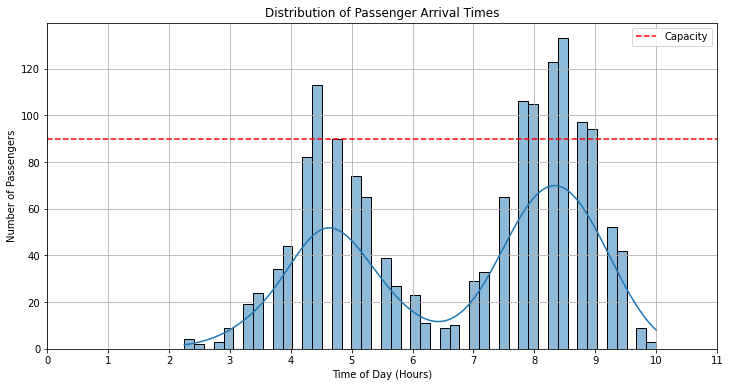

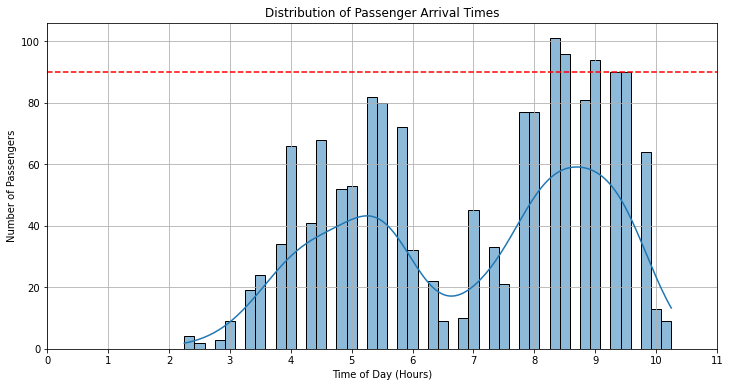

In [55]:
# 将ArrivalTime对齐到最近的15分钟区间
passengers_data['AlignedArrivalTime'] = passengers_data['ArrivalTime'] - (passengers_data['ArrivalTime'] % (15 * 60))

# 绘制直方图
plt.figure(figsize=(12, 6))
sns.histplot(passengers_data['AlignedArrivalTime']/3600, bins=12*4, kde=True)
plt.title('Distribution of Passenger Arrival Times')
plt.xlabel('Time of Day (Hours)')
plt.ylabel('Number of Passengers')
plt.xticks(range(0, 12))
plt.grid(True)
plt.axhline(y=90, color='red', linestyle='--', label='Capacity')
plt.legend()
plt.show()


passengers_data['new_AlignedArrivalTime'] = passengers_data['new_ArrivalTime'] - (passengers_data['new_ArrivalTime'] % (15 * 60))
# Plotting the distribution of new arrival times
plt.figure(figsize=(12, 6))
sns.histplot(passengers_data['new_AlignedArrivalTime']/3600, bins=12*4, kde=True)
plt.title('Distribution of Passenger Arrival Times')
plt.xlabel('Time of Day (Hours)')
plt.ylabel('Number of Passengers')
plt.xticks(range(0, 12))
plt.grid(True)
plt.axhline(y=90, color='red', linestyle='--', label='Capacity')